<a href="https://colab.research.google.com/github/yuvrajrajput/machine-learning-with-me/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

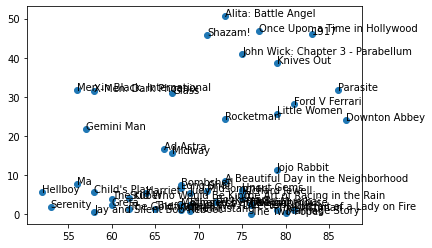

In [ ]:
data = '{"Title":{"0":"Long Shot","1":"Gemini Man","2":"Alita: Battle Angel","3":"Tolkien","4":"Richard Jewell","5":"Glass","6":"A Beautiful Day in the Neighborhood","7":"Ford V Ferrari","8":"Midway","9":"The Mustang","10":"Rocketman","11":"Serenity","12":"Parasite","13":"Judy","14":"Jojo Rabbit","15":"Blinded by the Light","16":"Jay and Silent Bob Reboot","17":"Booksmart","18":"Greta","19":"Hellboy","20":"The Current War: Director\'s Cut","21":"Knives Out","22":"1917","23":"Little Women","24":"John Wick: Chapter 3 - Parabellum","25":"Men in Black: International","26":"The Art of Racing in the Rain","27":"Downton Abbey","28":"Hotel Mumbai","29":"The Two Popes","30":"Harriet","31":"The Goldfinch","32":"Stuber","33":"Ad Astra","34":"The Kid Who Would Be King","35":"Motherless Brooklyn","36":"Once Upon a Time in Hollywood","37":"Midsommar","38":"X-Men: Dark Phoenix","39":"Uncut Gems","40":"Ma","41":"Child\'s Play","42":"The Irishman","43":"Portrait of a Lady on Fire","44":"Shazam!","45":"Bombshell","46":"Marriage Story","47":"The Lighthouse"},"IMDB":{"0":6.8,"1":5.7,"2":7.3,"3":6.8,"4":7.5,"5":6.7,"6":7.3,"7":8.1,"8":6.7,"9":6.9,"10":7.3,"11":5.3,"12":8.6,"13":6.9,"14":7.9,"15":6.9,"16":5.8,"17":7.2,"18":6.0,"19":5.2,"20":6.5,"21":7.9,"22":8.3,"23":7.9,"24":7.5,"25":5.6,"26":7.5,"27":8.7,"28":7.6,"29":7.6,"30":6.4,"31":6.2,"32":6.2,"33":6.6,"34":6.0,"35":6.8,"36":7.7,"37":7.1,"38":5.8,"39":7.5,"40":5.6,"41":5.8,"42":7.9,"43":8.1,"44":7.1,"45":6.8,"46":8.0,"47":7.6},"Box Office":{"0":53873809,"1":173469516,"2":404852543,"3":9090040,"4":43745542,"5":246999039,"6":67760877,"7":225508210,"8":125408249,"9":6405816,"10":195179299,"11":14454622,"12":254696104,"13":42693288,"14":90335025,"15":18019198,"16":4691248,"17":24863452,"18":18653107,"19":44664690,"20":11662493,"21":309232797,"22":368027644,"23":206006503,"24":326709727,"25":253890701,"26":33766787,"27":192094429,"28":21314816,"29":758711,"30":43282155,"31":9932621,"32":32390945,"33":132807427,"34":32140970,"35":18477736,"36":374343626,"37":46850563,"38":252442974,"39":50023780,"40":61105672,"41":44902237,"42":8000000,"43":9737660,"44":365971656,"45":59636523,"46":2300000,"47":17964238},"MPAA":{"0":4,"1":3,"2":3,"3":3,"4":4,"5":3,"6":2,"7":3,"8":3,"9":4,"10":4,"11":4,"12":4,"13":3,"14":3,"15":3,"16":4,"17":4,"18":4,"19":4,"20":3,"21":3,"22":4,"23":2,"24":4,"25":3,"26":2,"27":2,"28":4,"29":3,"30":3,"31":4,"32":4,"33":3,"34":2,"35":4,"36":4,"37":4,"38":3,"39":4,"40":4,"41":4,"42":4,"43":4,"44":3,"45":4,"46":4,"47":4}}'
data = pd.read_json(data)

#Rescale the axex
data["IMDB2"] = data["IMDB"]*10
data["Box Office2"]=data["Box Office"]/(0.8*10**7)
data["MPAA"] = data["MPAA"]-1
plt.scatter(data["IMDB2"], data["Box Office2"])
for _,i in data.iterrows():
    plt.annotate(i["Title"], (i["IMDB2"], i["Box Office2"]))

plt

In [ ]:
X =  data[["IMDB2","Box Office2"]].values
y = np.expand_dims(data["MPAA"].values,1)
train_split = 40
knn = KNeighborsClassifier(5, weights='distance')
knn.fit(X[:train_split],y[:train_split])
score = knn.score(X[train_split:],y[train_split:])
print("The accuracy on the test set is "+ str(score)+"%")


The accuracy on the test set is 0.875%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [ ]:
movie = 'Bombshell'
dist,neighbors = knn.kneighbors(data[data['Title']==movie][["IMDB2","Box Office2"]])
prediction = knn.predict( data[data['Title']==movie][["IMDB2","Box Office2"]])[0]
print(movie,prediction)
print(dist)
listt=data.to_numpy()[neighbors[0]][:,0].tolist()
for i in listt:
  print(data[data["Title"]==i])

Bombshell 3
[[0.72033925 2.34211847 3.39917447 4.49212045 5.10209076]]
       Title  IMDB  Box Office  MPAA  IMDB2  Box Office2
0  Long Shot   6.8    53873809     3   68.0     6.734226
   Title  IMDB  Box Office  MPAA  IMDB2  Box Office2
13  Judy   6.9    42693288     2   69.0     5.336661
        Title  IMDB  Box Office  MPAA  IMDB2  Box Office2
37  Midsommar   7.1    46850563     3   71.0      5.85632
      Title  IMDB  Box Office  MPAA  IMDB2  Box Office2
30  Harriet   6.4    43282155     2   64.0     5.410269
                                 Title  IMDB  ...  IMDB2  Box Office2
6  A Beautiful Day in the Neighborhood   7.3  ...   73.0      8.47011

[1 rows x 6 columns]
